# Somme de deux variables gaussiennes

## Solution

In [1]:
import openturns as ot

In [2]:
d1 = ot.Normal(-5, 3)
d2 = ot.Normal(5, 3)
dist = ot.ComposedDistribution([d1, d2])
inRV = ot.RandomVector(dist)

We can solve the problem using a `PythonFunction`.

In [3]:
def g(x):
    y = [x[0] + x[1]]
    return y

In [4]:
h = ot.PythonFunction(2, 1, g)
outRV = ot.CompositeRandomVector(h, inRV)

Another option is to use a `SymbolicFunction`.

In [5]:
inputs = ['x', 'y'] 
formula = ['x+y']
g = ot.SymbolicFunction(inputs, formula)

In [6]:
outRV = ot.CompositeRandomVector(g, inRV)

In [7]:
for N in [100, 1000, 10000]:
    x = outRV.getSample(N)
    print("N=",N)
    print("Mean=", x.computeMean())
    print("std=", x.computeStandardDeviationPerComponent())
    for a in [0.05, 0.50, 0.95]:
        print("quantile of level %1.2f = %1.6f"%(a, x.computeQuantile(a)[0]))

N= 100
Mean= [-0.237793]
std= [4.39938]
quantile of level 0.05 = -7.366265
quantile of level 0.50 = -0.316641
quantile of level 0.95 = 7.463649
N= 1000
Mean= [-0.109334]
std= [4.23358]
quantile of level 0.05 = -7.228896
quantile of level 0.50 = -0.177534
quantile of level 0.95 = 7.037153
N= 10000
Mean= [-0.01454]
std= [4.23622]
quantile of level 0.05 = -6.841447
quantile of level 0.50 = -0.055519
quantile of level 0.95 = 6.916933


Using the `+` operator:

In [8]:
rv = d1 + d2
print(rv)

Normal(mu = 0, sigma = 4.24264)


Get the mean:

In [9]:
rv.getMean()

class=Point name=Unnamed dimension=1 values=[0]

Get the standard deviation :

In [10]:
rv.getStandardDeviation()

class=Point name=Unnamed dimension=1 values=[4.24264]

Compute the quantiles of level $\alpha$=`0.05,0.50,0.95` :

In [11]:
q = [rv.computeQuantile(a)[0] for a in [0.05, 0.50, 0.95]]
print(q)

[-6.978522922060043, 0.0, 6.978522922060039]


With the `+` operator, the exact PDF is known.

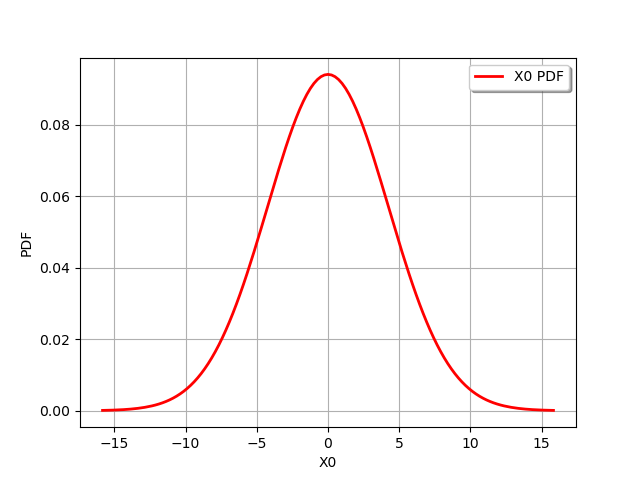

In [12]:
rv.drawPDF()

Obviously, the "+" operator provides exact results while using a Python or symbolic function provides only Monte-Carlo estimates.